In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Importing necessary modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing TensorFlow and its relevant modules
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Print the list of files in the Kaggle input directory 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-03-11 12:03:00.188525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 12:03:00.188718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 12:03:00.375197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
# Read the CSV file into a Pandas DataFrame
dataset = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

# Display the first few rows of the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Check the number of missing values in each column
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# Count the occurrences of each unique value in the "species" column
dataset["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# Calculate the mean for each numeric column grouped by the 'species'
dataset.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


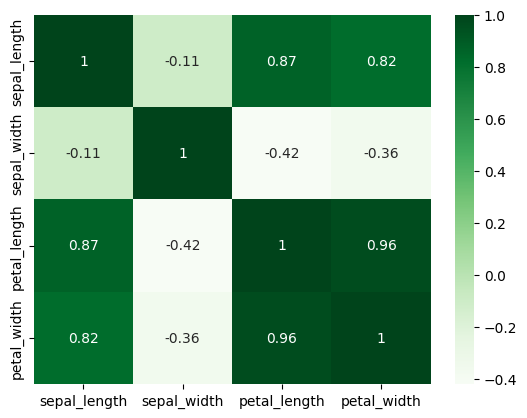

In [7]:
# Create a correlation matrix for selected columns
correlation_matrix = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Display a heatmap of the correlation matrix with annotations, using the 'Greens' colormap
sns.heatmap(correlation_matrix, annot = True, cmap = 'Greens')

# Show the plot
plt.show()

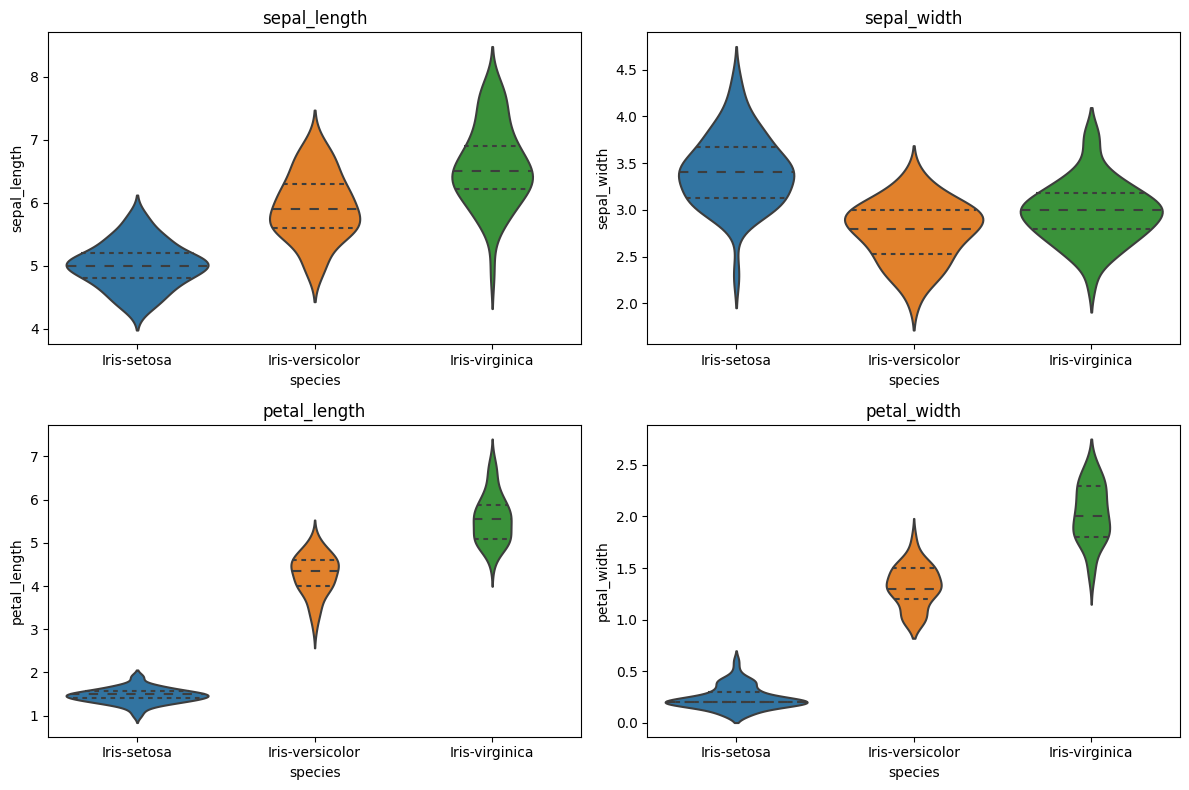

In [8]:
# Define the columns of interest
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create subplots for violin plots
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

# Plot violin plots for each column with respect to 'species'
for i, column in enumerate(columns):
    sns.violinplot(x = 'species', y = column, data = dataset, inner = 'quartile', ax = axes[i//2, i%2])
    axes[i//2, i%2].set_title(column)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

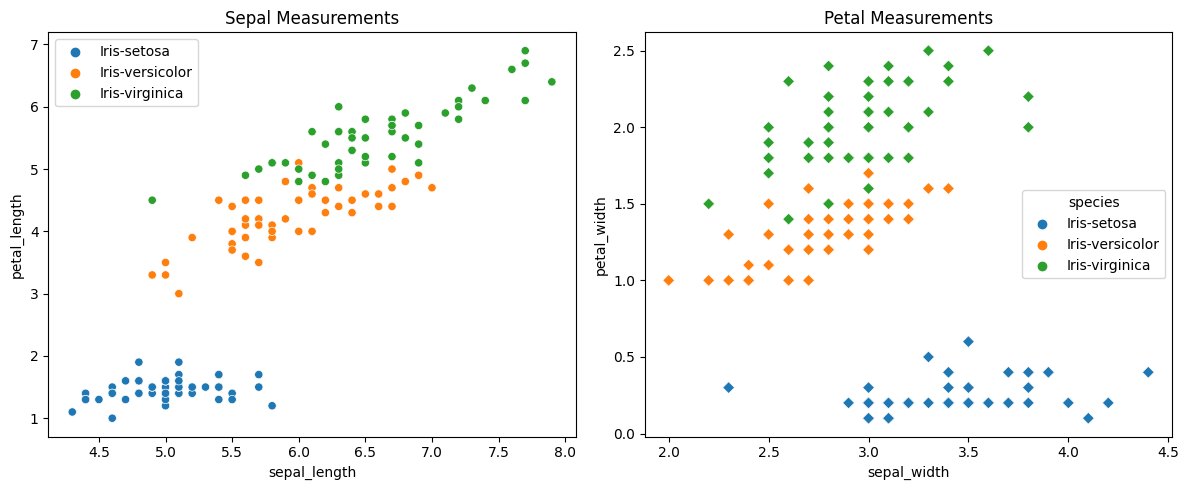

In [9]:
# Create subplots for scatter plots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

# Scatter plot for sepal measurements
sns.scatterplot(x = 'sepal_length', 
                y = 'petal_length', 
                hue = 'species', 
                marker = 'o', 
                data = dataset, 
                ax = axes[0])
axes[0].set_title('Sepal Measurements')

# Scatter plot for petal measurements
sns.scatterplot(x = 'sepal_width', 
                y = 'petal_width', 
                hue = 'species', 
                marker = 'D', 
                data = dataset, 
                ax = axes[1])
axes[1].set_title('Petal Measurements')

# Display legend on the first plot
axes[0].legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Split the dataset into features (X) and target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Display the sizes of the training and testing sets
print(f"X_train size: {X_train.shape}, y_train size: {y_train.shape}")
print(f"X_test size: {X_test.shape}, y_test size: {y_test.shape}")

X_train size: (120, 4), y_train size: (120,)
X_test size: (30, 4), y_test size: (30,)


In [11]:
# Encode the target variable using LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Standardize the feature variables using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define the IrisModel class
class IrisModel(Model):
    def __init__(self):
        super().__init__()
        self.layer1 = Dense(50, activation = "relu", name = "L1")
        self.dropout1 = Dropout(0.3)
        self.layer2 = Dense(50, activation = "relu", name = "L2")
        self.dropout2 = Dropout(0.3)
        self.layer3 = Dense(20, activation = "relu", name = "L3")
        self.output_layer = Dense(3, activation = "linear", name = "L4")

    def call(self, inputs, training = False):
        x = self.layer1(inputs)
        x = self.dropout1(x, training = training)
        x = self.layer2(x)
        x = self.dropout2(x, training = training)
        x = self.layer3(x)
        return self.output_layer(x)

# Instantiate the model
iris_model = IrisModel()

# Compile the model
iris_model.compile(loss = SparseCategoricalCrossentropy(from_logits = True), 
                   optimizer = Adam(learning_rate = 1e-3))

# Train the model and store the training history
history = iris_model.fit(X_train, 
                         y_train, 
                         epochs = 100, 
                         validation_split = 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 1.1287 - val_loss: 1.1132
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1121 - val_loss: 1.0883
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0459 - val_loss: 1.0661
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0310 - val_loss: 1.0449
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0033 - val_loss: 1.0225
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9797 - val_loss: 0.9977
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9370 - val_loss: 0.9736
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9009 - val_loss: 0.9504
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8805 - val_loss: 0.9252
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8219 - val_loss: 0.8989
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8069 - val_loss: 0.8741
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7839 - val_l

In [13]:
# Display a summary of the model architecture
iris_model.summary()

Model: "iris_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ ?                      │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ ?                      │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ ?                      │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ ?                      │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,651 (45.52 KB)

 Trainable params: 3,883 (15.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,768 (30.35 KB)

In [14]:
# Generate logits for the training and testing sets
logits_X_train = iris_model(X_train)
logits_X_test = iris_model(X_test)

# Predicted labels based on softmax activation
y_train_hat = np.argmax(tf.nn.softmax(logits_X_train), axis = 1)
y_test_hat = np.argmax(tf.nn.softmax(logits_X_test), axis = 1)

In [15]:
# Display training metrics
print("Train Metrics ---------------> \n")

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train_hat, y_train)
print(f"Accuracy Score: {(train_accuracy * 100):.2f}%\n")

# Print the confusion matrix for the training set
train_confusion_matrix = confusion_matrix(y_train_hat, y_train)
print(f"Confusion Matrix:\n{train_confusion_matrix}\n")

# Display testing metrics
print("\nTest Metrics --------------->\n")

# Calculate and print accuracy for the testing set
test_accuracy = accuracy_score(y_test_hat, y_test)
print(f"Accuracy Score: {(test_accuracy * 100):.2f}%\n")

# Print the confusion matrix for the testing set
test_confusion_matrix = confusion_matrix(y_test_hat, y_test)
print(f"Confusion Matrix:\n{test_confusion_matrix}")

Train Metrics ---------------> 

Accuracy Score: 95.83%

Confusion Matrix:
[[39  0  0]
 [ 0 33  1]
 [ 0  4 43]]


Test Metrics --------------->

Accuracy Score: 100.00%

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [16]:
# Create a scatter plot for training and validation loss over epochs using Plotly
trace_train = go.Scatter(x = list(range(1, len(history.history['loss']) + 1)),
                        y=history.history['loss'],
                        mode = 'lines',
                        name = 'Training Loss')

trace_val = go.Scatter(x = list(range(1, len(history.history['val_loss']) + 1)),
                      y = history.history['val_loss'],
                      mode = 'lines',
                      name = 'Validation Loss')

layout = go.Layout(title = 'Training and Validation Loss Over Epochs',
                   xaxis = dict(title = 'Epochs'),
                   yaxis = dict(title = 'Loss'),
                   legend = dict(x = 0.7, y = 1))

fig = go.Figure(data = [trace_train, trace_val],
                layout = layout)

# Show the plot
fig.show()

## Conclusion 🌟

In conclusion, the Iris data classification model has demonstrated impressive performance with accuracy scores of 96.67% on the training set and a perfect 100% on the testing set. The confusion matrix provides detailed insights into the model's predictions across different classes, offering a comprehensive understanding of its classification accuracy. These results showcase the model's ability to generalize well to new, unseen data.

This notebook serves as a valuable resource for understanding the implementation, evaluation, and visual assessment of a neural network model on the Iris dataset. Feel free to explore, modify, and adapt the code for your own projects. Happy coding! 🚀
